# 0  손실 비용:  11524102.0
# 500  손실 비용:  2312865.0
# 1000  손실 비용:  2164027.5
# 1500  손실 비용:  2119013.5
# 2000  손실 비용:  2081001.2
# 2500  손실 비용:  2046591.4
# 3000  손실 비용:  2014625.6
# 3500  손실 비용:  1984548.8
# 4000  손실 비용:  1956073.9
# 4500  손실 비용:  1929035.9
# 5000  손실 비용:  1903325.8
# 5500  손실 비용:  1878861.8
# 6000  손실 비용:  1855576.0
# 6500  손실 비용:  1833408.0
# 7000  손실 비용:  1812302.9
# 7500  손실 비용:  1792208.0
# 8000  손실 비용:  1773074.5
# 8500  손실 비용:  1754856.4
# 9000  손실 비용:  1737508.5
# 9500  손실 비용:  1720989.9
# 10000  손실 비용:  1705260.0
# 10500  손실 비용:  1690281.0
# 11000  손실 비용:  1676016.8
# 11500  손실 비용:  1662432.8
# 12000  손실 비용:  1649496.0
# 12500  손실 비용:  1637175.6
# 13000  손실 비용:  1625442.1
# 13500  손실 비용:  1614266.5
# 14000  손실 비용:  1603622.2
# 14500  손실 비용:  1593484.0
# 15000  손실 비용:  1583826.9
# 15500  손실 비용:  1574628.1
# 16000  손실 비용:  1565865.5
# 16500  손실 비용:  1557517.9
# 17000  손실 비용:  1549565.5
# 17500  손실 비용:  1541989.2
# 18000  손실 비용:  1534770.9
# 18500  손실 비용:  1527893

<module 'matplotlib.pyplot' from 'C:\\Users\\gram\\miniconda3\\envs\\ml\\lib\\site-packages\\matplotlib\\pyplot.py'>

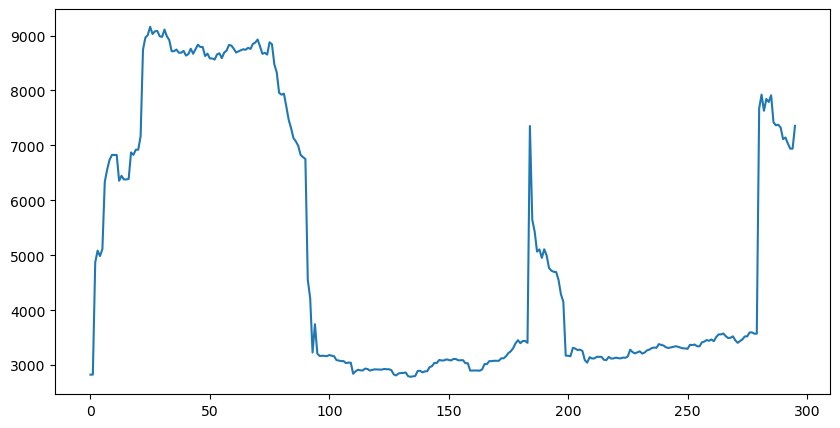

In [8]:
import tensorflow.compat.v1 as tf
import numpy as np
import matplotlib.pyplot as plt
from pandas.io.parsers import read_csv
tf.disable_v2_behavior()

# 데이터를 읽어들입니다.
data = read_csv('C:\\tangerine_price_prediction\data\innerjoin.csv', sep=',')
xy = np.array(data, dtype=np.float32)

# 학습 데이터와 테스트 데이터로 분리합니다.
train_x_data = xy[:800, 1:-1]  # 0 ~ 999번째 데이터를 학습 데이터로 사용합니다.
train_y_data = xy[:800, [-1]]
test_x_data = xy[800:, 1:-1]  # 1000번째 이후의 데이터를 테스트 데이터로 사용합니다.
test_y_data = xy[800:, [-1]]

# 플레이스홀더를 설정합니다.
X = tf.placeholder(tf.float32, shape=[None, 4])
Y = tf.placeholder(tf.float32, shape=[None, 1])
W = tf.Variable(tf.random_normal([4, 1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")

# 가설을 설정합니다.
hypothesis = tf.matmul(X, W) + b

# 비용 함수를 설정합니다.
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# 최적화 함수를 설정합니다.
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.000005)
train = optimizer.minimize(cost)

# 세션을 생성합니다.
sess = tf.Session()

# 글로벌 변수를 초기화합니다.
sess.run(tf.global_variables_initializer())

# 비용 그래프를 그리기 위한 리스트를 생성합니다.
cost_list = []

# 학습을 수행합니다.
for step in range(100001):
    cost_, hypo_, _ = sess.run([cost, hypothesis, train], feed_dict={X: train_x_data, Y: train_y_data})
    cost_list.append(cost_)
    if step % 500 == 0:
        print("#", step, " 손실 비용: ", cost_)

# 테스트 데이터로 모델의 성능을 평가합니다.
predict_y = sess.run(hypothesis, feed_dict={X: test_x_data})

# MSE 계산
mse = tf.reduce_mean(tf.square(predict_y - test_y_data))
print("Mean Squared Error: ", sess.run(mse))

# MAE 계산
mae = tf.reduce_mean(tf.abs(predict_y - test_y_data))
mae_result = sess.run(mae)
print("MAE: {}".format(mae_result))

# RMSE 계산
rmse = tf.sqrt(mse)
rmse_result = sess.run(rmse)
print("RMSE: {}".format(rmse_result))

# 테스트 데이터의 실제값과 예측값을 비교하는 그래프를 그립니다.
plt.figure(figsize=(10, 5))
plt.plot(test_y_data, label="actual")
plt

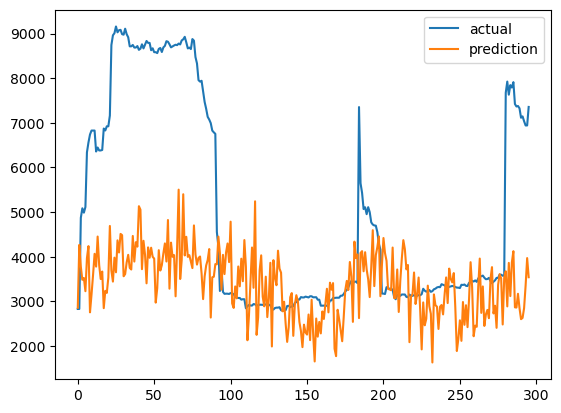

In [9]:
# 테스트 데이터의 실제값과 예측값을 비교하는 그래프를 그립니다.
plt.plot(test_y_data, label='actual')
plt.plot(predict_y, label='prediction')
plt.legend()
plt.show()

# 0  손실 비용:  11057473.0
# 500  손실 비용:  2434612.0
# 1000  손실 비용:  2258455.2
# 1500  손실 비용:  2198635.0
# 2000  손실 비용:  2149153.2
# 2500  손실 비용:  2104405.8
# 3000  손실 비용:  2062712.1
# 3500  손실 비용:  2023416.8
# 4000  손실 비용:  1986222.9
# 4500  손실 비용:  1950961.6
# 5000  손실 비용:  1917512.9
# 5500  손실 비용:  1885776.0
# 6000  손실 비용:  1855660.5
# 6500  손실 비용:  1827082.6
# 7000  손실 비용:  1799962.9
# 7500  손실 비용:  1774226.4
# 8000  손실 비용:  1749802.2
# 8500  손실 비용:  1726623.1
# 9000  손실 비용:  1704625.1
# 9500  손실 비용:  1683747.6
# 10000  손실 비용:  1663932.8
# 10500  손실 비용:  1645126.6
# 11000  손실 비용:  1627277.0
# 11500  손실 비용:  1610335.2
# 12000  손실 비용:  1594254.6
# 12500  손실 비용:  1578990.9
# 13000  손실 비용:  1564502.0
# 13500  손실 비용:  1550748.4
# 14000  손실 비용:  1537692.4
# 14500  손실 비용:  1525298.1
# 15000  손실 비용:  1513531.6
# 15500  손실 비용:  1502360.6
# 16000  손실 비용:  1491755.0
# 16500  손실 비용:  1481685.0
# 17000  손실 비용:  1472123.6
# 17500  손실 비용:  1463044.9
# 18000  손실 비용:  1454423.8
# 18500  손실 비용:  1446237

<module 'matplotlib.pyplot' from 'C:\\Users\\gram\\miniconda3\\envs\\ml\\lib\\site-packages\\matplotlib\\pyplot.py'>

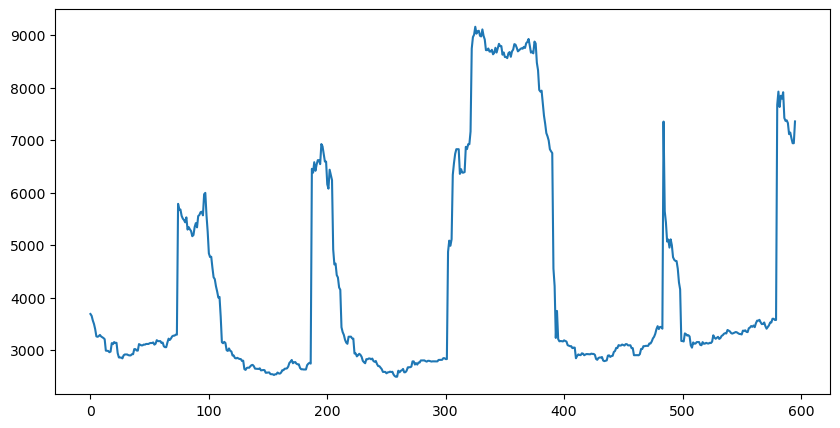

In [19]:
import tensorflow.compat.v1 as tf
import numpy as np
import matplotlib.pyplot as plt
from pandas.io.parsers import read_csv
tf.disable_v2_behavior()

# 데이터를 읽어들입니다.
data = read_csv('C:\\tangerine_price_prediction\data\innerjoin.csv', sep=',')
xy = np.array(data, dtype=np.float32)

# 학습 데이터와 테스트 데이터로 분리합니다.
train_x_data = xy[:500, 1:-1]  # 0 ~ 999번째 데이터를 학습 데이터로 사용합니다.
train_y_data = xy[:500, [-1]]
test_x_data = xy[500:, 1:-1]  # 1000번째 이후의 데이터를 테스트 데이터로 사용합니다.
test_y_data = xy[500:, [-1]]

# 플레이스홀더를 설정합니다.
X = tf.placeholder(tf.float32, shape=[None, 4])
Y = tf.placeholder(tf.float32, shape=[None, 1])
W = tf.Variable(tf.random_normal([4, 1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")

# 가설을 설정합니다.
hypothesis = tf.matmul(X, W) + b

# 비용 함수를 설정합니다.
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# 최적화 함수를 설정합니다.
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.000005)
train = optimizer.minimize(cost)

# 세션을 생성합니다.
sess = tf.Session()

# 글로벌 변수를 초기화합니다.
sess.run(tf.global_variables_initializer())

# 비용 그래프를 그리기 위한 리스트를 생성합니다.
cost_list = []

# 학습을 수행합니다.
for step in range(100001):
    cost_, hypo_, _ = sess.run([cost, hypothesis, train], feed_dict={X: train_x_data, Y: train_y_data})
    cost_list.append(cost_)
    if step % 500 == 0:
        print("#", step, " 손실 비용: ", cost_)

# 테스트 데이터로 모델의 성능을 평가합니다.
predict_y = sess.run(hypothesis, feed_dict={X: test_x_data})

# MSE 계산
mse = tf.reduce_mean(tf.square(predict_y - test_y_data))
print("Mean Squared Error: ", sess.run(mse))

# MAE 계산
mae = tf.reduce_mean(tf.abs(predict_y - test_y_data))
mae_result = sess.run(mae)
print("MAE: {}".format(mae_result))

# RMSE 계산
rmse = tf.sqrt(mse)
rmse_result = sess.run(rmse)
print("RMSE: {}".format(rmse_result))

TSS = tf.reduce_sum(tf.square(test_y_data - tf.reduce_mean(test_y_data)))
RSS = tf.reduce_sum(tf.square(predict_y - test_y_data))
R2 = 1 - (RSS/TSS)
print("R2: {}".format(sess.run(R2)))

# 테스트 데이터의 실제값과 예측값을 비교하는 그래프를 그립니다.
plt.figure(figsize=(10, 5))
plt.plot(test_y_data, label="actual")
plt

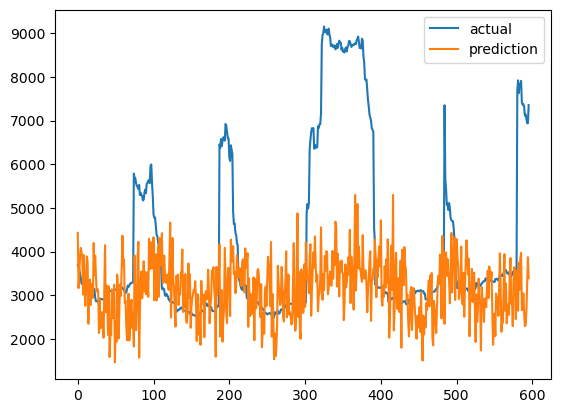

In [13]:
# 테스트 데이터의 실제값과 예측값을 비교하는 그래프를 그립니다.
plt.plot(test_y_data, label='actual')
plt.plot(predict_y, label='prediction')
plt.legend()
plt.show()

In [20]:
# 감귤 튀는 값(2021년 7월-9월 가격 삭제) 빼고 진행
import tensorflow.compat.v1 as tf
import numpy as np
import matplotlib.pyplot as plt
from pandas.io.parsers import read_csv
tf.disable_v2_behavior()

# 데이터를 읽어들입니다.
data = read_csv('C:\\try.csv', sep=',')
xy = np.array(data, dtype=np.float32)

# 학습 데이터와 테스트 데이터로 분리합니다.
train_x_data = xy[:700, 1:-1]  # 0 ~ 999번째 데이터를 학습 데이터로 사용합니다.
train_y_data = xy[:700, [-1]]
test_x_data = xy[700:, 1:-1]  # 1000번째 이후의 데이터를 테스트 데이터로 사용합니다.
test_y_data = xy[700:, [-1]]

# 플레이스홀더를 설정합니다.
X = tf.placeholder(tf.float32, shape=[None, 4])
Y = tf.placeholder(tf.float32, shape=[None, 1])
W = tf.Variable(tf.random_normal([4, 1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")

# 가설을 설정합니다.
hypothesis = tf.matmul(X, W) + b

# 비용 함수를 설정합니다.
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# 최적화 함수를 설정합니다.
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.000005)
train = optimizer.minimize(cost)

# 세션을 생성합니다.
sess = tf.Session()

# 글로벌 변수를 초기화합니다.
sess.run(tf.global_variables_initializer())

# 비용 그래프를 그리기 위한 리스트를 생성합니다.
cost_list = []

# 학습을 수행합니다.
for step in range(100001):
    cost_, hypo_, _ = sess.run([cost, hypothesis, train], feed_dict={X: train_x_data, Y: train_y_data})
    cost_list.append(cost_)
    if step % 500 == 0:
        print("#", step, " 손실 비용: ", cost_)

# 테스트 데이터로 모델의 성능을 평가합니다.
predict_y = sess.run(hypothesis, feed_dict={X: test_x_data})

mae = np.sum(np.abs(test_y_data - sess.run(hypothesis, feed_dict={X: test_x_data}))) / len(test_y_data)
mse = np.sum(np.square(test_y_data - sess.run(hypothesis, feed_dict={X: test_x_data}))) / len(test_y_data)
rmse = np.sqrt(mse)
print("MAE: {}".format(mae))
print("MSE: {}".format(mse))
print("RMSE: {}".format(rmse))

# MSE 계산
mse = tf.reduce_mean(tf.square(predict_y - test_y_data))
print("Mean Squared Error: ", sess.run(mse))

# MAE 계산
mae = tf.reduce_mean(tf.abs(predict_y - test_y_data))
mae_result = sess.run(mae)
print("MAE: {}".format(mae_result))

# RMSE 계산
rmse = tf.sqrt(mse)
rmse_result = sess.run(rmse)
print("RMSE: {}".format(rmse_result))

TSS = tf.reduce_sum(tf.square(test_y_data - tf.reduce_mean(test_y_data)))
RSS = tf.reduce_sum(tf.square(predict_y - test_y_data))
R2 = 1 - (RSS/TSS)
print("R2: {}".format(sess.run(R2)))

# 0  손실 비용:  12088481.0
# 500  손실 비용:  2450863.2
# 1000  손실 비용:  2292546.8
# 1500  손실 비용:  2245835.2
# 2000  손실 비용:  2206893.8
# 2500  손실 비용:  2171701.8
# 3000  손실 비용:  2138947.8
# 3500  손실 비용:  2108048.0
# 4000  손실 비용:  2078720.5
# 4500  손실 비용:  2050810.1
# 5000  손실 비용:  2024217.0
# 5500  손실 비용:  1998866.2
# 6000  손실 비용:  1974692.9
# 6500  손실 비용:  1951640.5
# 7000  손실 비용:  1929655.6
# 7500  손실 비용:  1908687.8
# 8000  손실 비용:  1888689.5
# 8500  손실 비용:  1869615.5
# 9000  손실 비용:  1851423.1
# 9500  손실 비용:  1834070.9
# 10000  손실 비용:  1817519.5
# 10500  손실 비용:  1801732.0
# 11000  손실 비용:  1786672.6
# 11500  손실 비용:  1772307.4
# 12000  손실 비용:  1758604.2
# 12500  손실 비용:  1745531.8
# 13000  손실 비용:  1733061.1
# 13500  손실 비용:  1721164.1
# 14000  손실 비용:  1709814.0
# 14500  손실 비용:  1698985.4
# 15000  손실 비용:  1688653.5
# 15500  손실 비용:  1678795.8
# 16000  손실 비용:  1669389.9
# 16500  손실 비용:  1660414.9
# 17000  손실 비용:  1651850.4
# 17500  손실 비용:  1643678.0
# 18000  손실 비용:  1635878.4
# 18500  손실 비용:  1628435

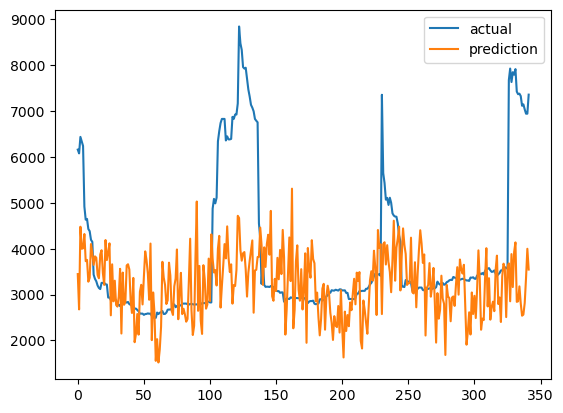

In [15]:
# 테스트 데이터의 실제값과 예측값을 비교하는 그래프를 그립니다.
plt.plot(test_y_data, label='actual')
plt.plot(predict_y, label='prediction')
plt.legend()
plt.show()

In [22]:
#상관 관계 행렬

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.io.parsers import read_csv
import seaborn as sns

# 데이터를 읽어들입니다.
data = read_csv('C:\\try.csv', sep=',')
data.keys()



Index(['year', 'avgTemp', 'maxTemp', 'minTemp', 'rainFall', 'avgPrice'], dtype='object')

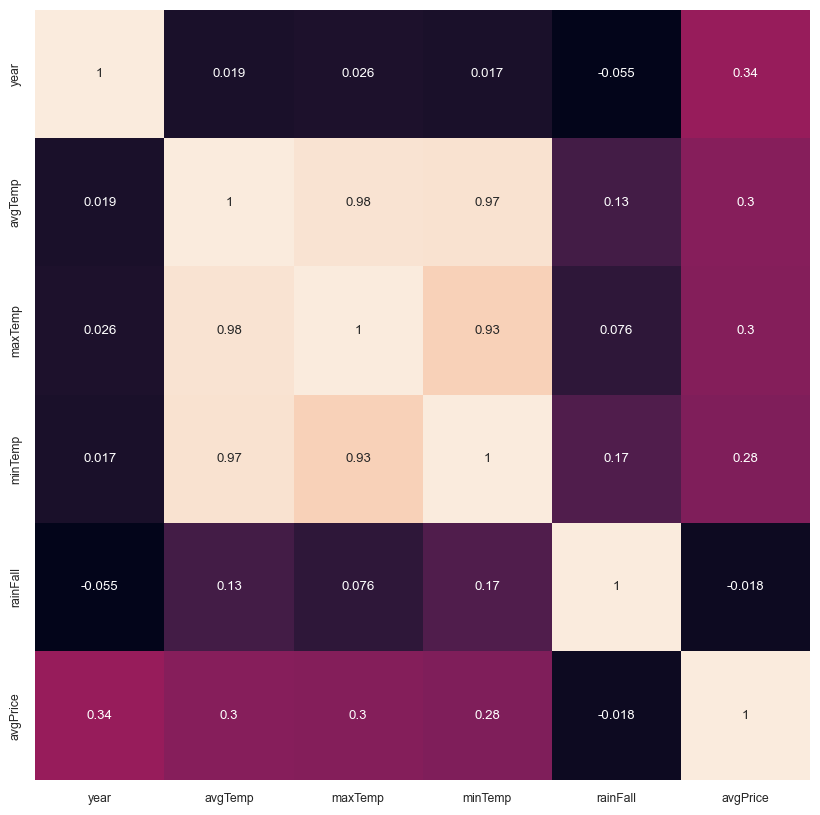

In [25]:
df = pd.DataFrame(data)
#상관 관계 행렬
df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

# 0  손실 비용:  11095641.0
# 500  손실 비용:  4020095.0
# 1000  손실 비용:  3582315.8
# 1500  손실 비용:  3246631.5
# 2000  손실 비용:  2986941.2
# 2500  손실 비용:  2785366.0
# 3000  손실 비용:  2628572.2
# 3500  손실 비용:  2506447.8
# 4000  손실 비용:  2411245.0
# 4500  손실 비용:  2336982.2
# 5000  손실 비용:  2279024.8
# 5500  손실 비용:  2233772.5
# 6000  손실 비용:  2198424.0
# 6500  손실 비용:  2170797.5
# 7000  손실 비용:  2149192.0
# 7500  손실 비용:  2132282.2
# 8000  손실 비용:  2119035.8
# 8500  손실 비용:  2108645.0
# 9000  손실 비용:  2100482.0
# 9500  손실 비용:  2094057.2
# 10000  손실 비용:  2088987.4
# 10500  손실 비용:  2084975.0
# 11000  손실 비용:  2081787.1
# 11500  손실 비용:  2079242.6
# 12000  손실 비용:  2077199.6
# 12500  손실 비용:  2075548.1
# 13000  손실 비용:  2074201.9
# 13500  손실 비용:  2073093.9
# 14000  손실 비용:  2072171.8
# 14500  손실 비용:  2071394.1
# 15000  손실 비용:  2070730.1
# 15500  손실 비용:  2070154.4
# 16000  손실 비용:  2069647.2
# 16500  손실 비용:  2069194.2
# 17000  손실 비용:  2068782.6
# 17500  손실 비용:  2068404.2
# 18000  손실 비용:  2068051.6
# 18500  손실 비용:  2067718

<module 'matplotlib.pyplot' from 'C:\\Users\\gram\\miniconda3\\envs\\ml\\lib\\site-packages\\matplotlib\\pyplot.py'>

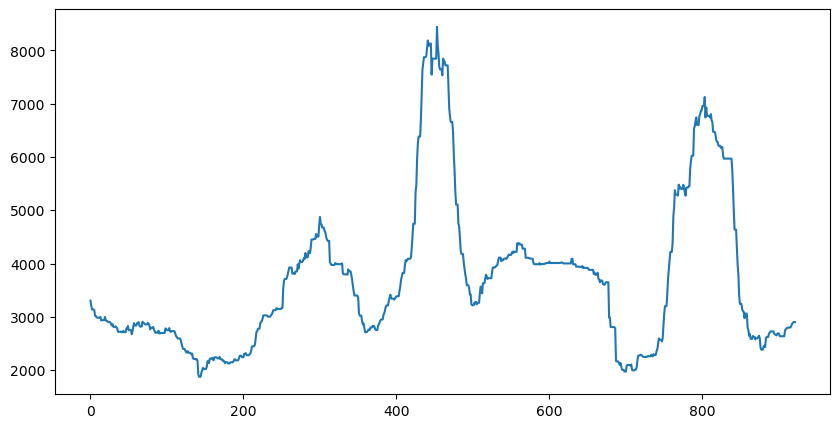

In [10]:
#배추가격

import tensorflow.compat.v1 as tf
import numpy as np
import matplotlib.pyplot as plt
from pandas.io.parsers import read_csv
tf.disable_v2_behavior()

# 데이터를 읽어들입니다.
data = read_csv('C:\\cabbage_price.csv', sep=',')
xy = np.array(data, dtype=np.float32)

# 학습 데이터와 테스트 데이터로 분리합니다.
train_x_data = xy[:2000, 1:-1]  # 0 ~ 999번째 데이터를 학습 데이터로 사용합니다.
train_y_data = xy[:2000, [-1]]
test_x_data = xy[2000:, 1:-1]  # 1000번째 이후의 데이터를 테스트 데이터로 사용합니다.
test_y_data = xy[2000:, [-1]]

# 플레이스홀더를 설정합니다.
X = tf.placeholder(tf.float32, shape=[None, 4])
Y = tf.placeholder(tf.float32, shape=[None, 1])
W = tf.Variable(tf.random_normal([4, 1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")

# 가설을 설정합니다.
hypothesis = tf.matmul(X, W) + b

# 비용 함수를 설정합니다.
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# 최적화 함수를 설정합니다.
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.000005)
train = optimizer.minimize(cost)

# 세션을 생성합니다.
sess = tf.Session()

# 글로벌 변수를 초기화합니다.
sess.run(tf.global_variables_initializer())

# 비용 그래프를 그리기 위한 리스트를 생성합니다.
cost_list = []

# 학습을 수행합니다.
for step in range(100001):
    cost_, hypo_, _ = sess.run([cost, hypothesis, train], feed_dict={X: train_x_data, Y: train_y_data})
    cost_list.append(cost_)
    if step % 500 == 0:
        print("#", step, " 손실 비용: ", cost_)

# 테스트 데이터로 모델의 성능을 평가합니다.
predict_y = sess.run(hypothesis, feed_dict={X: test_x_data})

# MSE 계산
mse = tf.reduce_mean(tf.square(predict_y - test_y_data))
print("Mean Squared Error: ", sess.run(mse))

# MAE 계산
mae = tf.reduce_mean(tf.abs(predict_y - test_y_data))
mae_result = sess.run(mae)
print("MAE: {}".format(mae_result))

# RMSE 계산
rmse = tf.sqrt(mse)
rmse_result = sess.run(rmse)
print("RMSE: {}".format(rmse_result))

# 테스트 데이터의 실제값과 예측값을 비교하는 그래프를 그립니다.
plt.figure(figsize=(10, 5))
plt.plot(test_y_data, label="actual")
plt

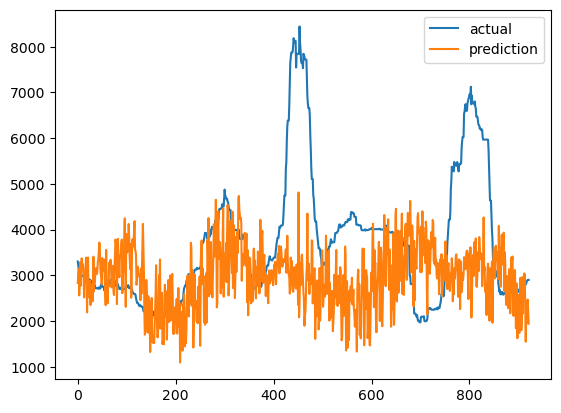

In [11]:
# 테스트 데이터의 실제값과 예측값을 비교하는 그래프를 그립니다.
plt.plot(test_y_data, label='actual')
plt.plot(predict_y, label='prediction')
plt.legend()
plt.show()